# TRENDxCoolProp Simulation

### Simulation eines rechtslaufenden Kraft-Wärme-Prozesses mit R290 (Propan) als Kältemittel im $T{,}s$- und $\log(p){,}h$-Diagramm

## Joule-Thomson-Koeffizient für Propan

## Theoretischer Hintergrund

Der **Joule-Thomson-Koeffizient** $\delta_{h}$ beschreibt die Temperaturänderung eines Gases bei isenthalper Expansion (Drosselung):

$$\delta_{h} = \left(\frac{\partial T}{\partial P}\right)_h$$

### Thermodynamische Herleitung

Aus der Maxwell-Relation und thermodynamischen Identitäten folgt:

$$\delta_{h} = -\frac{1}{c_p} \left[T \left(\frac{\partial v}{\partial T}\right)_P - v\right]$$

wobei:
- $c_p$ = spezifische Wärmekapazität bei konstantem Druck [J/(kg·K)]
- $v$ = spezifisches Volumen [m³/kg]
- $T$ = Temperatur [K]
- $P$ = Druck [Pa]

### Alternative Formulierung mit Dichte

Mit $v = 1/\rho$ kann man auch schreiben:

$$\delta_{h} = \frac{1}{\rho c_p} \left[T \left(\frac{\partial \rho}{\partial T}\right)_P + \rho\right]$$

## Berechnung am kritischen Punkt von Propan

In [42]:
# Erforderliche Bibliotheken importieren
import CoolProp.CoolProp as CP
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

print("CoolProp Version:", CP.get_global_param_string("version"))

CoolProp Version: 7.2.0


## Definition der Berechnungsfunktion

In [23]:
def joule_thomson_koeffizient(fluid, T, P, method='numerical'):
    """
    Berechnet den Joule-Thomson-Koeffizienten
    
    Parameter:
    ----------
    fluid : str
        Fluidname für CoolProp (z.B. 'Propane')
    T : float
        Temperatur in K
    P : float
        Druck in Pa
    method : str
        'numerical' für numerische Differentiation (Standard)
        'analytical' für analytische Berechnung (wenn verfügbar)
    
    Returns:
    --------
    mu_JT : float
        Joule-Thomson-Koeffizient in K/Pa
    """
    
    # Eigenschaften am Zustandspunkt abrufen
    c_p = CP.PropsSI('C', 'T', T, 'P', P, fluid)  # J/(kg·K)
    rho = CP.PropsSI('D', 'T', T, 'P', P, fluid)  # kg/m³
    v = 1.0 / rho  # m³/kg
    
    if method == 'numerical':
        # Numerische Differentiation von v nach T bei konstantem P
        # Verwende zentrale Differenzen für bessere Genauigkeit
        dT = 0.01  # K - kleine Störung
        
        T_plus = T + dT
        T_minus = T - dT
        
        rho_plus = CP.PropsSI('D', 'T', T_plus, 'P', P, fluid)
        rho_minus = CP.PropsSI('D', 'T', T_minus, 'P', P, fluid)
        
        v_plus = 1.0 / rho_plus
        v_minus = 1.0 / rho_minus
        
        dvdT_p = (v_plus - v_minus) / (2 * dT)  # m³/(kg·K)
        
    else:
        raise ValueError("Nur 'numerical' Methode ist implementiert")
    
    # Joule-Thomson-Koeffizient berechnen
    mu_JT = -(1.0 / c_p) * (T * dvdT_p - v)
    
    return mu_JT

## Berechnung für Propan am kritischen Punkt

In [24]:
# Fluid definieren
fluid = 'Propane'

# Kritische Eigenschaften abrufen
T_crit = CP.PropsSI(fluid, 'Tcrit')  # K
P_crit = CP.PropsSI(fluid, 'pcrit')  # Pa

print("="*70)
print(f"Fluid: {fluid}")
print("="*70)
print(f"\nKritische Eigenschaften:")
print(f"  T_crit = {T_crit:.2f} K = {T_crit - 273.15:.2f} °C")
print(f"  P_crit = {P_crit/1e5:.3f} bar")

Fluid: Propane

Kritische Eigenschaften:
  T_crit = 369.89 K = 96.74 °C
  P_crit = 42.512 bar


In [25]:
# Joule-Thomson-Koeffizient am kritischen Punkt berechnen
mu_JT_crit = joule_thomson_koeffizient(fluid, T_crit, P_crit)

print("\n" + "="*70)
print("Joule-Thomson-Koeffizient am kritischen Punkt")
print("="*70)
print(f"  μ_JT = {mu_JT_crit * 1e6:.4f} K/MPa")

# Interpretation
if abs(mu_JT_crit) < 1e-8:
    print(f"\n  ⚠ Der Wert ist sehr klein (≈ 0)")
    print(f"    Dies ist typisch für den kritischen Punkt!")
elif mu_JT_crit > 0:
    print(f"\n  ✓ μ_JT > 0: Das Gas kühlt sich bei Drosselung ab")
else:
    print(f"\n  ✓ μ_JT < 0: Das Gas erwärmt sich bei Drosselung")


Joule-Thomson-Koeffizient am kritischen Punkt
  μ_JT = 24.3873 K/MPa

  ✓ μ_JT > 0: Das Gas kühlt sich bei Drosselung ab


## Joule-Thomson-Koeffizient bei Zustand 1

In [26]:
T_1 = 200  # K
p_1 = 0.25e6  # Pa

mu_JT_Z1 = joule_thomson_koeffizient(fluid, T_1, p_1)

print(f"  μ_JT = {mu_JT_Z1 * 1e6:.4f} K/MPa")
# Interpretation
if abs(mu_JT_Z1) < 1e-8:
    print(f"\n  ⚠ Der Wert ist sehr klein (≈ 0)")
elif mu_JT_Z1 > 0:
    print(f"\n  ✓ μ_JT > 0: Das Gas kühlt sich bei Drosselung ab")
else:
    print(f"\n  ✓ μ_JT < 0: Das Gas erwärmt sich bei Drosselung")

  μ_JT = 0.4969 K/MPa

  ✓ μ_JT > 0: Das Gas kühlt sich bei Drosselung ab


## Zusätzliche thermodynamische Eigenschaften am kritischen Punkt

In [27]:
# Weitere Eigenschaften berechnen
c_p_crit = CP.PropsSI('C', 'T', T_crit, 'P', P_crit, fluid)
c_v_crit = CP.PropsSI('O', 'T', T_crit, 'P', P_crit, fluid)
rho_crit = CP.PropsSI('D', 'T', T_crit, 'P', P_crit, fluid)
h_crit = CP.PropsSI('H', 'T', T_crit, 'P', P_crit, fluid)
s_crit = CP.PropsSI('S', 'T', T_crit, 'P', P_crit, fluid)
alpha_crit = CP.PropsSI('isobaric_expansion_coefficient', 'T', T_crit, 'P', P_crit, fluid)

print("\n" + "="*70)
print("Weitere Eigenschaften am kritischen Punkt")
print("="*70)
print(f"\n  c_p              = {c_p_crit:.2f} J/(kg·K)")
print(f"  c_v              = {c_v_crit:.2f} J/(kg·K)")
print(f"  κ = c_p/c_v      = {c_p_crit/c_v_crit:.4f}")
print(f"  ρ                = {rho_crit:.3f} kg/m³")
print(f"  v = 1/ρ          = {1/rho_crit:.6f} m³/kg")
print(f"  h                = {h_crit/1000:.2f} kJ/kg")
print(f"  s                = {s_crit/1000:.4f} kJ/(kg·K)")
print(f"  α = (∂v/∂T)_P/v  = {alpha_crit:.6e} 1/K")
print("\n" + "="*70)


Weitere Eigenschaften am kritischen Punkt

  c_p              = -748692.16 J/(kg·K)
  c_v              = 2671.58 J/(kg·K)
  κ = c_p/c_v      = -280.2435
  ρ                = 220.246 kg/m³
  v = 1/ρ          = 0.004540 m³/kg
  h                = 555.50 kJ/kg
  s                = 2.0523 kJ/(kg·K)
  α = (∂v/∂T)_P/v  = -5.769296e+00 1/K



In [28]:
# CoolProp Ansatz
from CoolProp.CoolProp import PropsSI

p_m = 1.925e6  # Pa (1,925 MPa)
T_m = 268.70   # K

rho_bezug = PropsSI('D', 'T', T_m, 'P', p_m, fluid)
print(f"rho_bezug = {rho_bezug:.6f} kg/m³")

rho_bezug = 537.328157 kg/m³


## Zustandsberechnungen

### Eingabeparametern

In [29]:
T_1 = 263.15 # K
T_3 = 308.15  # K Maximale Temperatur
p_1 = 0.90e6  # Pa (0.90 MPa)
p_2 = 3.60e6  # Pa (3.6 MPa)
eta_sP = 0.5  # isentropen Wirkungsgrad der Pumpe
eta_V = 0.90  # volumetrischer Wirkungsgrad der Pumpe
dot_m_ang = 0.04 # [kg/s] angenommene Massenstrom

In [30]:
# Zustand 1
T_1
p_1
h_1 = PropsSI('H', 'T', T_1, 'P', p_1, fluid)
s_1 = PropsSI('S', 'T', T_1, 'P', p_1, fluid)
rho_1 = PropsSI('D', 'T', T_1, 'P', p_1, fluid)

# Zustand 2
h_2s = PropsSI('H', 'S', s_1, 'P', p_2, fluid)
h_2 = ((h_2s-h_1)/eta_sP) + h_1
T_2 = PropsSI('T', 'P', p_2, 'H', h_2, fluid)
s_2 = PropsSI('S', 'P', p_2, 'H', h_2, fluid)
rho_2 = PropsSI('D', 'P', p_2, 'H', h_2, fluid)

# Zustand 3
T_3
p_3 = p_2
h_3 = PropsSI('H', 'T', T_3, 'P', p_3, fluid)
s_3 = PropsSI('S', 'T', T_3, 'P', p_3, fluid)
rho_3 = PropsSI('D', 'T', T_3, 'P', p_3, fluid)

# Zustand 4
p_4 = p_1
h_4 = h_3
T_4 = PropsSI('T', 'P', p_4, 'H', h_4, fluid)
s_4 = PropsSI('S', 'P', p_4, 'H', h_4, fluid)
rho_4 = PropsSI('D', 'P', p_4, 'H', h_4, fluid)

print("\n" + "="*60)
print("Zustand 1")
print("="*60)
print(f"  T_1 = {T_1:.2f} K = {T_1 - 273.15:.2f} °C")
print(f"  p_1 = {p_1/1e6:.3f} MPa")
print(f"  h_1 = {h_1/1000:.4f} kJ/kg")
print(f"  s_1 = {s_1:.4f} J/(kg·K)")
print(f"  ρ_1 = {rho_1:.4f} kg/m³")

print("\n" + "="*60)
print("Zustand 2")
print("="*60)
print(f"  T_2 = {T_2:.2f} K = {T_2 - 273.15:.2f} °C")
print(f"  p_2 = {p_2/1e6:.3f} MPa")
print(f"  h_2s = {h_2s/1000:.4f} kJ/kg")
print(f"  h_2 = {h_2/1000:.4f} kJ/kg")
print(f"  s_2 = {s_2:.4f} J/(kg·K)")
print(f"  ρ_2 = {rho_2:.4f} kg/m³")

print("\n" + "="*60)
print("Zustand 3")
print("="*60)
print(f"  T_3 = {T_3:.2f} K = {T_3 - 273.15:.2f} °C")
print(f"  p_3 = {p_3/1e6:.3f} MPa")
print(f"  h_3 = {h_3/1000:.4f} kJ/kg")
print(f"  s_3 = {s_3:.4f} J/(kg·K)")
print(f"  ρ_3 = {rho_3:.4f} kg/m³")

print("\n" + "="*60)
print("Zustand 4")
print("="*60)
print(f"  T_4 = {T_4:.2f} K = {T_4 - 273.15:.2f} °C")
print(f"  p_4 = {p_4/1e6:.3f} MPa")
print(f"  h_4 = {h_4/1000:.4f} kJ/kg")
print(f"  s_4 = {s_4:.4f} J/(kg·K)")
print(f"  s_2 = {s_2:.4f} J/(kg·K)")
print(f"  ρ_4 = {rho_4:.4f} kg/m³")

print("="*60)   


Zustand 1
  T_1 = 263.15 K = -10.00 °C
  p_1 = 0.900 MPa
  h_1 = 175.7239 kJ/kg
  s_1 = 906.5050 J/(kg·K)
  ρ_1 = 542.7559 kg/m³

Zustand 2
  T_2 = 266.48 K = -6.67 °C
  p_2 = 3.600 MPa
  h_2s = 180.6853 kJ/kg
  h_2 = 185.6467 kJ/kg
  s_2 = 925.1956 J/(kg·K)
  ρ_2 = 543.0476 kg/m³

Zustand 3
  T_3 = 308.15 K = 35.00 °C
  p_3 = 3.600 MPa
  h_3 = 292.3873 kJ/kg
  s_3 = 1296.7722 J/(kg·K)
  ρ_3 = 484.6003 kg/m³

Zustand 4
  T_4 = 295.96 K = 22.81 °C
  p_4 = 0.900 MPa
  h_4 = 292.3873 kJ/kg
  s_4 = 1317.2659 J/(kg·K)
  s_2 = 925.1956 J/(kg·K)
  ρ_4 = 146.0999 kg/m³


### weitere Berechnungen

In [31]:
print("=" * 60)

delta_T12 = T_1 -T_2 # K
delta_T23 = T_2 -T_3 # K
psi = p_2/p_1
dot_Q_41 = (h_1 - h_4) * dot_m_ang # kW
dot_Q_23 = (h_3 - h_2) * dot_m_ang # kW
P_t = (h_2-h_1) * dot_m_ang # kW
epsilon_WP = -dot_Q_41 / P_t
dot_V_th = dot_m_ang / rho_1 # m³/s
dot_V_Real = dot_V_th * eta_V
psi_12 = p_2/p_1

# Unterkühlungsgrad berechnen
# Punkte an der Sättigungskurve bei Druck p_1
h_f_1 = PropsSI('H', 'P', p_1, 'Q', 0, fluid)
T_f_1 = CP.PropsSI('T', 'P', p_1, 'H', h_f_1, fluid)
# Punkte an der Sättigungskurve bei Druck p_2
h_f_2 = PropsSI('H', 'P', p_2, 'Q', 0, fluid)
T_f_2 = CP.PropsSI('T', 'P', p_2, 'H', h_f_2, fluid)

print(f"  ΔT_12 = {abs(delta_T12):.4f} K ({abs(delta_T12)/T_1*100:.4f} %)")
print(f"  ΔT_23 = {abs(delta_T23):.4f} K ({abs(delta_T23)/T_2*100:.4f} %)")
print(f"  psi = {psi:.4f}")
print(f"  dot_Q_41 = {dot_Q_41/1e3:.4f} kW")
print(f"  dot_Q_23 = {dot_Q_23/1e3:.4f} kW")
print(f"  P_t = {P_t*1e-3:.4f} kW")
print(f"  epsilon_WP = {epsilon_WP:.4f}") 
print(f"  dot_V_th = {dot_V_th*1e3:.4f} L/s")
print(f"  dot_V_Real = {dot_V_Real*1e3:.4f} L/s")
print(f"  ψ_12 = {psi_12:.4f}")
print(f"  h_f_1 = {h_f_1/1000:.4f} kJ/kg")
print(f"  h_f_2 = {h_f_2/1000:.2f} kJ/kg")
print(f"  T_f_1 = {T_f_1:.4f} K = {T_f_1 - 273.15:.2f} °C")
print(f"  T_f_2 = {T_f_2:.2f} K = {T_f_2 - 273.15:.2f} °C")
print("=" * 60)

  ΔT_12 = 3.3329 K (1.2666 %)
  ΔT_23 = 41.6671 K (15.6359 %)
  psi = 4.0000
  dot_Q_41 = -4.6665 kW
  dot_Q_23 = 4.2696 kW
  P_t = 0.3969 kW
  epsilon_WP = 11.7571
  dot_V_th = 0.0737 L/s
  dot_V_Real = 0.0663 L/s
  ψ_12 = 4.0000
  h_f_1 = 259.1656 kJ/kg
  h_f_2 = 471.45 kJ/kg
  T_f_1 = 295.9565 K = 22.81 °C
  T_f_2 = 360.70 K = 87.55 °C


## Überprüfung der Parameter

### LEWA Datenblatt

In [32]:
# Temperaturbereich
T_P_min = 263.15  # K (entspricht -10 °C)
T_P_max = 273.15  # K (entspricht 40 °C)
# Dichtebereich
rho_P_min = 0.53 *1e3 # g/cm^3
rho_P_max = 0.54 *1e3   # g/cm^3
# dynamische Viskosität
eta_dyn_min = 0.13 /1e3# Pa·s
eta_dyn_max = 0.14 /1e3# Pa·s
# Erfordel. Dosierstrom
dot_V_dos_min = 20.00/3.6e6  # m³/s
dot_V_dos_max = 240.00/3.6e6  # m³/s
# Druckbereich
p_druck = 3.6   # MPa
p_saug = 0.9   # MPa

In [33]:
# Volumenstrom prüfen
print("\n" + "="*70)
print("PRÜFUNG DER VOLUMENSTOM")
print("="*70)

if dot_V_Real < dot_V_dos_min or dot_V_Real > dot_V_dos_max:
    print("\n⚠️  Warnung: Der reale Volumenstrom liegt außerhalb des empfohlenen Dosierstrombereichs!")
    print(f"   Empfohlener Dosierstrombereich: {dot_V_dos_min*3.6e6:.2f} L/h bis {dot_V_dos_max*3.6e6:.2f} L/h")
    print(f"   Berechneter realer Volumenstrom: {dot_V_Real*3.6e6:.2f} L/h")
else:
    print("\n✓ Der reale Volumenstrom liegt im empfohlenen Dosierstrombereich.")

# Dichte vor und nach der Pumpeprüfen
print("\n" + "="*70)
print("PRÜFUNG DER DICHTE VOR UND NACH DER PUMPE")
print("="*70)

rho_i = [rho_1, rho_2]
for i, rho in enumerate(rho_i, start=1):
    if rho < rho_P_min or rho > rho_P_max:
        print(f"\n⚠️  Warnung: Die Dichte im Zustand {i} liegt außerhalb des empfohlenen Bereichs!")
        print(f"   Empfohlener Dichtebereich: {rho_P_min:.2f} kg/m³ bis {rho_P_max:.2f} kg/m³")
        print(f"   Berechnete Dichte im Zustand {i}: {rho:.2f} kg/m³")
    else:
        print(f"\n✓ Die Dichte im Zustand {i} liegt im empfohlenen Bereich.")

# Temperatur vor und nach der Pumpe prüfen
print("\n" + "="*70)
print("PRÜFUNG DER TEMPERATUR VOR UND NACH DER PUMPE")
print("="*70)

T_i = [T_1, T_2]
for i, T in enumerate(T_i, start=1):
    if T < T_P_min or T > T_P_max:
        print(f"\n⚠️  Warnung: Die Temperatur im Zustand {i} liegt außerhalb des empfohlenen Bereichs!")
        print(f"   Empfohlener Temperaturbereich: {T_P_min-273.15:.2f} °C bis {T_P_max-273.15:.2f} °C")
        print(f"   Berechnete Temperatur im Zustand {i}: {T-273.15:.2f} °C")
    else:
        print(f"\n✓ Die Temperatur im Zustand {i} liegt im empfohlenen Bereich.")

# Druck vor und nach der Pumpe prüfen
print("\n" + "="*70)
print("PRÜFUNG DER DRUCK VOR UND NACH DER PUMPE")
print("="*70)

p_i = [p_1/1e6, p_2/1e6]  # in MPa
for i, p in enumerate(p_i, start=1):
    if i == 1:  # Saugdruck
        if p < p_saug:
            print(f"\n⚠️  Warnung: Der Saugdruck im Zustand {i} liegt unter dem empfohlenen Mindestwert!")
            print(f"   Empfohlener Mindest-Saugdruck: {p_saug:.2f} MPa")
            print(f"   Berechneter Saugdruck im Zustand {i}: {p:.2f} MPa")
        else:
            print(f"\n✓ Der Saugdruck im Zustand {i} liegt im empfohlenen Bereich.")
    elif i == 2:  # Druck nach der Pumpe
        if p > p_druck:
            print(f"\n⚠️  Warnung: Der Druck im Zustand {i} liegt über dem empfohlenen Maximalwert!")
            print(f"   Empfohlener Maximaldruck: {p_druck:.2f} MPa")
            print(f"   Berechneter Druck im Zustand {i}: {p:.2f} MPa")
        else:
            print(f"\n✓ Der Druck im Zustand {i} liegt im empfohlenen Bereich.")



PRÜFUNG DER VOLUMENSTOM

✓ Der reale Volumenstrom liegt im empfohlenen Dosierstrombereich.

PRÜFUNG DER DICHTE VOR UND NACH DER PUMPE

⚠️  Warnung: Die Dichte im Zustand 1 liegt außerhalb des empfohlenen Bereichs!
   Empfohlener Dichtebereich: 530.00 kg/m³ bis 540.00 kg/m³
   Berechnete Dichte im Zustand 1: 542.76 kg/m³

⚠️  Warnung: Die Dichte im Zustand 2 liegt außerhalb des empfohlenen Bereichs!
   Empfohlener Dichtebereich: 530.00 kg/m³ bis 540.00 kg/m³
   Berechnete Dichte im Zustand 2: 543.05 kg/m³

PRÜFUNG DER TEMPERATUR VOR UND NACH DER PUMPE

✓ Die Temperatur im Zustand 1 liegt im empfohlenen Bereich.

✓ Die Temperatur im Zustand 2 liegt im empfohlenen Bereich.

PRÜFUNG DER DRUCK VOR UND NACH DER PUMPE

✓ Der Saugdruck im Zustand 1 liegt im empfohlenen Bereich.

✓ Der Druck im Zustand 2 liegt im empfohlenen Bereich.


## LOG(P)-H-DIAGRAMM

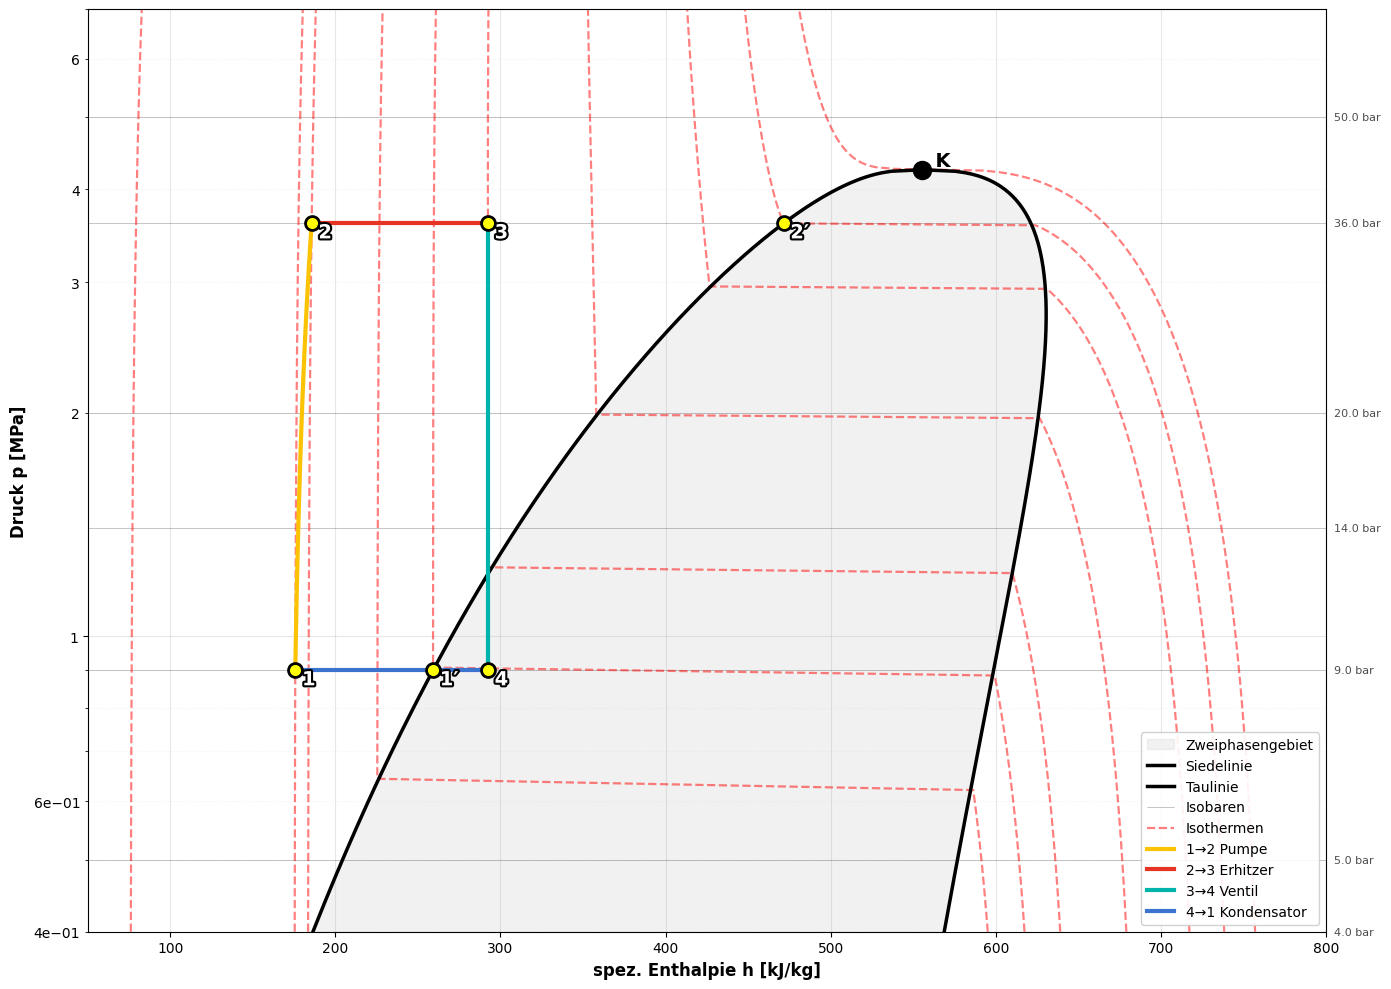


LEISTUNGSKENNZAHLEN

Bei Massenstrom ṁ = 0.04 kg/s:
  Erhitzerwärmestrom:     Q̇_E = 4.27 kW
  Kondensatorwärmestrom:  Q̇_K = -4.67 kW
  Pumpenleistung:         P_t = 0.3969 kW
  Leistungszahl:          ε_WP = 11.76

UNTERKÜHLUNGSGRADE
  T_isothermen_1 = 220.00 K
  T_isothermen_2 = 263.15 K
  T_isothermen_3 = 266.48 K
  T_isothermen_4 = 283.15 K
  T_isothermen_5 = 295.96 K
  T_isothermen_6 = 308.15 K
  T_isothermen_7 = 360.70 K
  T_isothermen_8 = 330.00 K
  T_isothermen_9 = 350.00 K
  T_isothermen_10 = 370.00 K
  T_U1 = 295.96 K
  T_U2 = 360.70 K
  Unterkühlungsgrad 1′→1: ΔT = 32.81 K
  Unterkühlungsgrad 2′→2: ΔT = 94.21 K


In [34]:
# Druckbereich für Isolinien
p_min = 0.4e6   # 0.4 MPa
p_max = 7.0e6   # 7.0 MPa
p_crit = CP.PropsSI('pcrit', fluid)
T_crit = CP.PropsSI('Tcrit', fluid)
h_crit = CP.PropsSI('H', 'P', p_crit, 'T', T_crit, fluid)

# Enthalpiebereich
h_min = 50e3    # 50 kJ/kg
h_max = 800e3   # 800 kJ/kg

# Sättigungskurve (Siedelinie und Taulinie)
p_sat = np.linspace(p_min, p_crit, 200)
h_liquid = []  # Siedelinie
h_vapor = []   # Taulinie

for p in p_sat:
    try:
        if p < p_crit:
            h_l = CP.PropsSI('H', 'P', p, 'Q', 0, fluid)  # Siedende Flüssigkeit
            h_v = CP.PropsSI('H', 'P', p, 'Q', 1, fluid)  # Gesättigter Dampf
        else:
            h_l = h_crit
            h_v = h_crit
        h_liquid.append(h_l)
        h_vapor.append(h_v)
    except:
        h_liquid.append(np.nan)
        h_vapor.append(np.nan)

# Isobaren
p_isobars = [p_min, p_1, 0.5e6, 1.4e6, 2.0e6, p_2, p_max-2e6]  # Pa
h_range = np.linspace(h_min, h_max, 500)

# Isothermen
T_isotherms = [220, T_1, T_2, 283.15, T_4, 308.15, T_f_2, 330, 350, 370]  # K

# Plot erstellen
fig, ax = plt.subplots(figsize=(14, 10))

# Zweiphasengebiet füllen
h_liquid_array = np.array(h_liquid)
h_vapor_array = np.array(h_vapor)
p_sat_array = np.array(p_sat)

# Entferne NaN-Werte
valid_idx = ~(np.isnan(h_liquid_array) | np.isnan(h_vapor_array))
h_liquid_valid = h_liquid_array[valid_idx]
h_vapor_valid = h_vapor_array[valid_idx]
p_sat_valid = p_sat_array[valid_idx]

# Zweiphasengebiet füllen
ax.fill_betweenx(p_sat_valid/1e6, h_liquid_valid/1000, h_vapor_valid/1000, 
                 color='lightgray', alpha=0.3, zorder=1, label='Zweiphasengebiet')

# Sättigungskurve zeichnen
ax.plot(np.array(h_liquid)/1000, np.array(p_sat)/1e6, 'k-', linewidth=2.5, 
        label='Siedelinie', zorder=3)
ax.plot(np.array(h_vapor)/1000, np.array(p_sat)/1e6, 'k-', linewidth=2.5, 
        label='Taulinie', zorder=3)

# Kritischen Punkt markieren
ax.plot(h_crit/1000, p_crit/1e6, 'ko', markersize=12, markerfacecolor='black', 
        markeredgewidth=2, zorder=7)
ax.text(h_crit/1000, p_crit/1e6, '  K', fontsize=14, fontweight='bold', 
        ha='left', va='bottom', color='black')

# Flags für Legende
isobar_plotted = False
isotherm_plotted = False

# Isobaren zeichnen
for p_iso in p_isobars:
    h_iso = []
    p_iso_list = []
    for h in h_range:
        try:
            T_test = CP.PropsSI('T', 'H', h, 'P', p_iso, fluid)
            if 200 < T_test < 450:
                h_iso.append(h)
                p_iso_list.append(p_iso)
        except:
            pass
    
    if len(h_iso) > 1:
        if not isobar_plotted:
            ax.plot(np.array(h_iso)/1000, np.array(p_iso_list)/1e6, 'k-', 
                    linewidth=0.4, alpha=0.4, label='Isobaren')
            isobar_plotted = True
        else:
            ax.plot(np.array(h_iso)/1000, np.array(p_iso_list)/1e6, 'k-', 
                    linewidth=0.4, alpha=0.4)
        
        if len(h_iso) > 10:
            ax.text(h_iso[-1]/1000 + 5, p_iso/1e6, f'{p_iso/1e5:.1f} bar', 
                    fontsize=8, va='center', alpha=0.7, ha='left')

# Isothermen zeichnen
for i, T_iso in enumerate(T_isotherms):
    h_iso = []
    p_iso_list = []
    for p in np.linspace(p_min, p_max, 300):
        try:
            h_test = CP.PropsSI('H', 'T', T_iso, 'P', p, fluid)
            if h_min < h_test < h_max:
                h_iso.append(h_test)
                p_iso_list.append(p)
        except:
            pass
    
    if len(h_iso) > 1:
        if not isotherm_plotted:
            ax.plot(np.array(h_iso)/1000, np.array(p_iso_list)/1e6, 'red', 
                    linewidth=1.6, alpha=0.5, linestyle='--', label='Isothermen')
            isotherm_plotted = True
        else:
            ax.plot(np.array(h_iso)/1000, np.array(p_iso_list)/1e6, 'red', 
                    linewidth=1.6, alpha=0.5, linestyle='--')


# Kreisprozess einzeichnen
h_12 = np.linspace(h_1, h_2, 50)
p_12 = np.linspace(p_1, p_2, 50)
ax.plot(h_12/1000, p_12/1e6, '#FCC204', linewidth=3, label='1→2 Pumpe', zorder=5)

h_23 = np.linspace(h_2, h_3, 50)
p_23 = np.full_like(h_23, p_2)
ax.plot(h_23/1000, p_23/1e6, '#E63323', linewidth=3, label='2→3 Erhitzer', zorder=5)

h_34 = np.full(50, h_3)
p_34 = np.linspace(p_3, p_4, 50)
ax.plot(h_34/1000, p_34/1e6, '#00B3AB', linewidth=3, label='3→4 Ventil', zorder=5)

h_41 = np.linspace(h_4, h_1, 50)
p_41 = np.full_like(h_41, p_1)
ax.plot(h_41/1000, p_41/1e6, '#3B73CE', linewidth=3, label='4→1 Kondensator', zorder=5)

# Zustandspunkte markieren
import matplotlib.patheffects as path_effects

states = [(h_1, p_1, '1'), (h_2, p_2, '2'), (h_3, p_3, '3'), (h_4, p_4, '4'), 
          (h_f_1, p_1, "1′"), (h_f_2, p_2, "2′")]
for h, p, label in states:
    ax.plot(h/1000, p/1e6, 'ko', markersize=10, markerfacecolor='yellow', 
            markeredgewidth=2, zorder=6)
    text = ax.text(h/1000, p/1e6, f' {label}', fontsize=14, fontweight='bold', 
                   ha='left', va='top', color='white', zorder=7)
    text.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground='black'),
        path_effects.Normal()
    ])

# Achsenbeschriftung und Layout
ax.set_xlabel('spez. Enthalpie h [kJ/kg]', fontsize=12, fontweight='bold')
ax.set_ylabel('Druck p [MPa]', fontsize=12, fontweight='bold')
ax.set_yscale('log')

# DETAILLIERTE Y-ACHSEN-SKALIERUNG
from matplotlib.ticker import LogLocator, LogFormatter

ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=15))
ax.yaxis.set_major_formatter(LogFormatter(base=10.0, labelOnlyBase=False))

ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=100))
ax.yaxis.set_minor_formatter(LogFormatter(base=10.0, labelOnlyBase=False, minor_thresholds=(2, 0.5)))

# Grid für beide
ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.15)

ax.legend(loc='lower right', fontsize=10, framealpha=0.9)
ax.set_xlim([h_min/1000, h_max/1000])
ax.set_ylim([p_min/1e6, p_max/1e6])

plt.tight_layout()
plt.show()

# Leistungskennzahlen
print("\n" + "="*70)
print("LEISTUNGSKENNZAHLEN")
print("="*70)
print(f"\nBei Massenstrom ṁ = {dot_m_ang:.2f} kg/s:")
print(f"  Erhitzerwärmestrom:     Q̇_E = {dot_Q_23*1e-3:.2f} kW")
print(f"  Kondensatorwärmestrom:  Q̇_K = {dot_Q_41*1e-3:.2f} kW")
print(f"  Pumpenleistung:         P_t = {P_t*1e-3:.4f} kW")
print(f"  Leistungszahl:          ε_WP = {epsilon_WP:.2f}")

print("\n" + "="*70)
print("UNTERKÜHLUNGSGRADE")
print("="*70)
for i, T_iso in enumerate(T_isotherms, 1):
    print(f"  T_isothermen_{i} = {T_iso:.2f} K")
print(f"  T_U1 = {T_f_1:.2f} K")
print(f"  T_U2 = {T_f_2:.2f} K")
print(f"  Unterkühlungsgrad 1′→1: ΔT = {abs(T_1 - T_f_1):.2f} K")
print(f"  Unterkühlungsgrad 2′→2: ΔT = {abs(T_2 - T_f_2):.2f} K")
print("="*70)

C:\Users\nka-mbr\AppData\Local\Temp\ipykernel_12456\989915754.py:127: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(s_iso, T_iso_list, 'g-', linewidth=0.8, alpha=0.5,
C:\Users\nka-mbr\AppData\Local\Temp\ipykernel_12456\989915754.py:131: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(s_iso, T_iso_list, 'g-', linewidth=0.8, alpha=0.5,


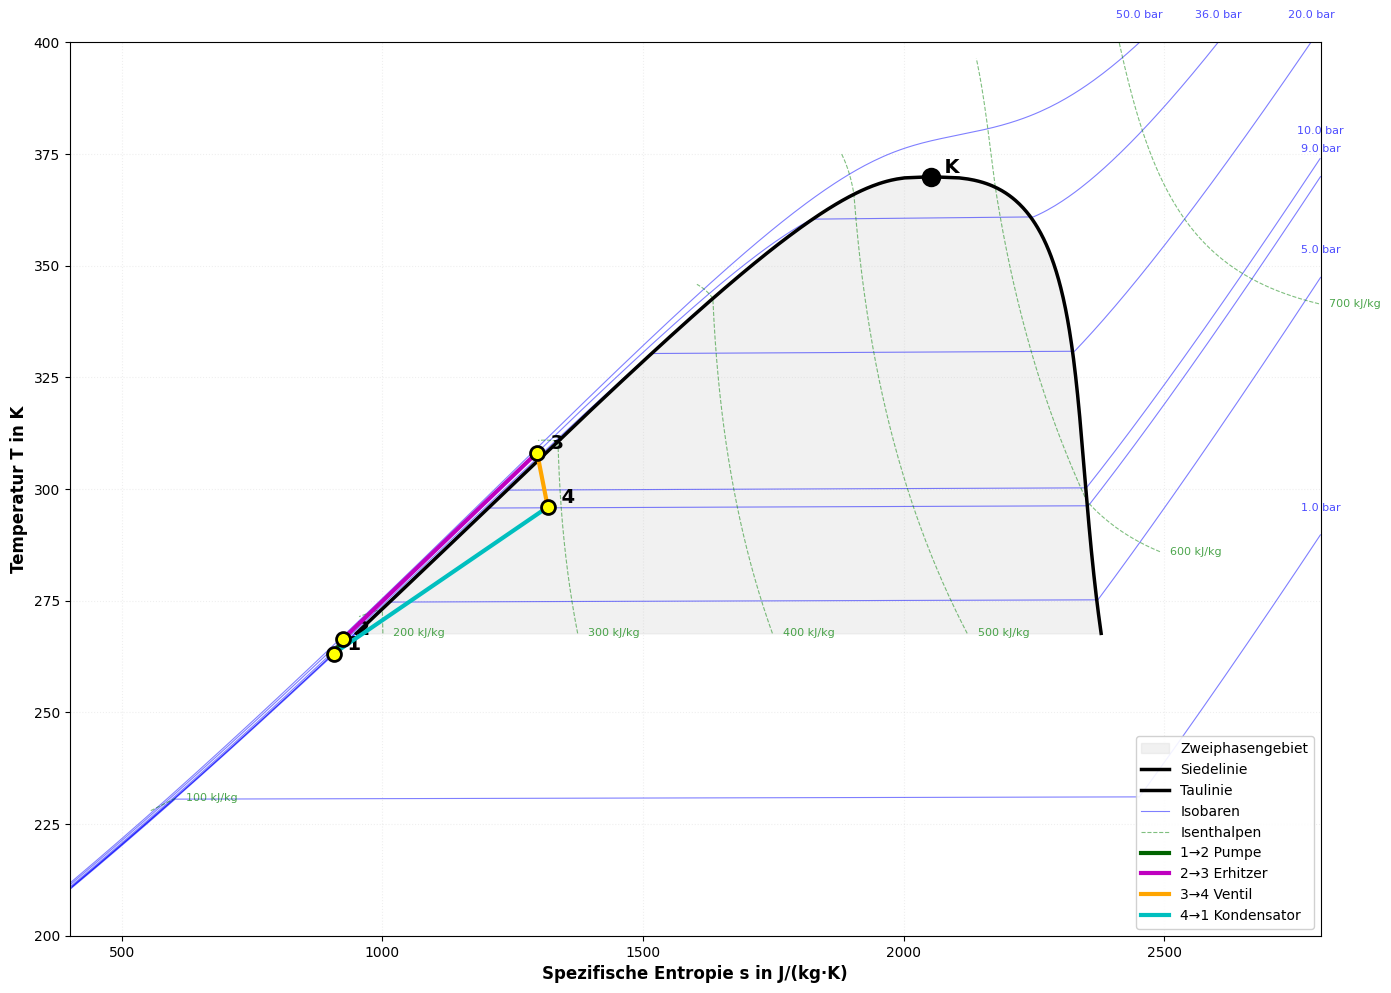

In [35]:
# ============================================================================
# T-s-DIAGRAMM (Temperatur-Entropie-Diagramm)
# ============================================================================

# Entropiebereich
s_min = 400    # J/(kg·K)
s_max = 2800   # J/(kg·K)

# Temperaturbereich
T_min = 200    # K
T_max = 400    # K

# Sättigungskurve (Siedelinie und Taulinie) für T-s-Diagramm
p_sat_Ts = np.linspace(p_min, p_crit, 200)
s_liquid = []  # Siedelinie
s_vapor = []   # Taulinie
T_sat = []     # Sättigungstemperatur

for p in p_sat_Ts:
    try:
        if p < p_crit:
            s_l = CP.PropsSI('S', 'P', p, 'Q', 0, fluid)  # Siedende Flüssigkeit
            s_v = CP.PropsSI('S', 'P', p, 'Q', 1, fluid)  # Gesättigter Dampf
            T_s = CP.PropsSI('T', 'P', p, 'Q', 0, fluid)  # Sättigungstemperatur
        else:
            s_l = CP.PropsSI('S', 'P', p_crit, 'T', T_crit, fluid)
            s_v = s_l
            T_s = T_crit
        s_liquid.append(s_l)
        s_vapor.append(s_v)
        T_sat.append(T_s)
    except:
        s_liquid.append(np.nan)
        s_vapor.append(np.nan)
        T_sat.append(np.nan)

# Isobaren (konstante Drucklinien) - BLAU
p_isobars_Ts = [0.1e6, p_1, 0.5e6, 1.0e6, 2.0e6, p_2, 5.0e6]
s_range = np.linspace(s_min, s_max, 500)

# Isenthalpen (konstante Enthalpielinien) - GRÜN
h_isenthalps = [100e3, 200e3, 300e3, 400e3, 500e3, 600e3, 700e3]  # J/kg

# Plot erstellen
fig, ax = plt.subplots(figsize=(14, 10))

# Zweiphasengebiet füllen
s_liquid_array = np.array(s_liquid)
s_vapor_array = np.array(s_vapor)
T_sat_array = np.array(T_sat)

# Entferne NaN-Werte
valid_idx_Ts = ~(np.isnan(s_liquid_array) | np.isnan(s_vapor_array) | np.isnan(T_sat_array))
s_liquid_valid = s_liquid_array[valid_idx_Ts]
s_vapor_valid = s_vapor_array[valid_idx_Ts]
T_sat_valid = T_sat_array[valid_idx_Ts]

# Zweiphasengebiet füllen
ax.fill_betweenx(T_sat_valid, s_liquid_valid, s_vapor_valid, 
                 color='lightgray', alpha=0.3, zorder=1, label='Zweiphasengebiet')

# Sättigungskurve zeichnen
ax.plot(s_liquid_array, T_sat_array, 'k-', linewidth=2.5, 
        label='Siedelinie', zorder=3)
ax.plot(s_vapor_array, T_sat_array, 'k-', linewidth=2.5, 
        label='Taulinie', zorder=3)

# Kritischen Punkt markieren
s_crit = CP.PropsSI('S', 'P', p_crit, 'T', T_crit, fluid)
ax.plot(s_crit, T_crit, 'ko', markersize=12, markerfacecolor='black', 
        markeredgewidth=2, zorder=7)
ax.text(s_crit, T_crit, '  K', fontsize=14, fontweight='bold', 
        ha='left', va='bottom', color='black')

# Flags für Legende
isobar_Ts_plotted = False
isenthalp_plotted = False

# Isobaren zeichnen (BLAU)
for p_iso in p_isobars_Ts:
    s_iso = []
    T_iso_list = []
    
    # Im flüssigen und überhitzten Bereich
    for T in np.linspace(T_min, T_max, 400):
        try:
            s_test = CP.PropsSI('S', 'T', T, 'P', p_iso, fluid)
            if s_min < s_test < s_max:
                s_iso.append(s_test)
                T_iso_list.append(T)
        except:
            pass
    
    if len(s_iso) > 1:
        if not isobar_Ts_plotted:
            ax.plot(s_iso, T_iso_list, 'b-', linewidth=0.8, alpha=0.5, 
                    label='Isobaren')
            isobar_Ts_plotted = True
        else:
            ax.plot(s_iso, T_iso_list, 'b-', linewidth=0.8, alpha=0.5)
        
        # Beschriftung am oberen Rand
        if len(s_iso) > 10:
            idx_top = np.argmax(T_iso_list)
            ax.text(s_iso[idx_top], T_iso_list[idx_top] + 5, 
                    f'{p_iso/1e5:.1f} bar', 
                    fontsize=8, ha='center', va='bottom', alpha=0.7, color='blue')

# Isenthalpen zeichnen (GRÜN)
for h_iso in h_isenthalps:
    s_iso = []
    T_iso_list = []
    
    # Über Druckbereich
    for p in np.linspace(p_min, p_max, 400):
        try:
            T_test = CP.PropsSI('T', 'H', h_iso, 'P', p, fluid)
            s_test = CP.PropsSI('S', 'H', h_iso, 'P', p, fluid)
            if T_min < T_test < T_max and s_min < s_test < s_max:
                s_iso.append(s_test)
                T_iso_list.append(T_test)
        except:
            pass
    
    if len(s_iso) > 1:
        if not isenthalp_plotted:
            ax.plot(s_iso, T_iso_list, 'g-', linewidth=0.8, alpha=0.5, 
                    linestyle='--', label='Isenthalpen')
            isenthalp_plotted = True
        else:
            ax.plot(s_iso, T_iso_list, 'g-', linewidth=0.8, alpha=0.5, 
                    linestyle='--')
        
        # Beschriftung am rechten Rand
        if len(s_iso) > 10:
            idx_right = np.argmax(s_iso)
            ax.text(s_iso[idx_right] + 20, T_iso_list[idx_right], 
                    f'{h_iso/1000:.0f} kJ/kg', 
                    fontsize=8, ha='left', va='center', alpha=0.7, color='green')

# Kreisprozess einzeichnen
# 1 → 2: Pumpe
s_12 = np.linspace(s_1, s_2, 50)
T_12 = np.linspace(T_1, T_2, 50)
ax.plot(s_12, T_12, 'darkgreen', linewidth=3, label='1→2 Pumpe', zorder=5)

# 2 → 3: Erhitzer (isobar)
s_23 = np.linspace(s_2, s_3, 50)
T_23 = np.linspace(T_2, T_3, 50)
ax.plot(s_23, T_23, 'm-', linewidth=3, label='2→3 Erhitzer', zorder=5)

# 3 → 4: Expansionsventil (isenthalp)
s_34 = np.linspace(s_3, s_4, 50)
T_34 = np.linspace(T_3, T_4, 50)
ax.plot(s_34, T_34, 'orange', linewidth=3, label='3→4 Ventil', zorder=5)

# 4 → 1: Kondensator (isobar)
s_41 = np.linspace(s_4, s_1, 50)
T_41 = np.linspace(T_4, T_1, 50)
ax.plot(s_41, T_41, 'c-', linewidth=3, label='4→1 Kondensator', zorder=5)

# Zustandspunkte markieren
states_Ts = [(s_1, T_1, '1'), (s_2, T_2, '2'), (s_3, T_3, '3'), (s_4, T_4, '4')]
for s, T, label in states_Ts:
    ax.plot(s, T, 'ko', markersize=10, markerfacecolor='yellow', 
            markeredgewidth=2, zorder=6)
    ax.text(s, T, f'  {label}', fontsize=14, fontweight='bold', 
            ha='left', va='bottom')

# Achsenbeschriftung und Layout
ax.set_xlabel('Spezifische Entropie s in J/(kg·K)', fontsize=12, fontweight='bold')
ax.set_ylabel('Temperatur T in K', fontsize=12, fontweight='bold')
ax.grid(True, which='both', linestyle=':', alpha=0.2)
ax.legend(loc='lower right', fontsize=10, framealpha=0.9)
ax.set_xlim([s_min, s_max])
ax.set_ylim([T_min, T_max])

plt.tight_layout()
plt.show()

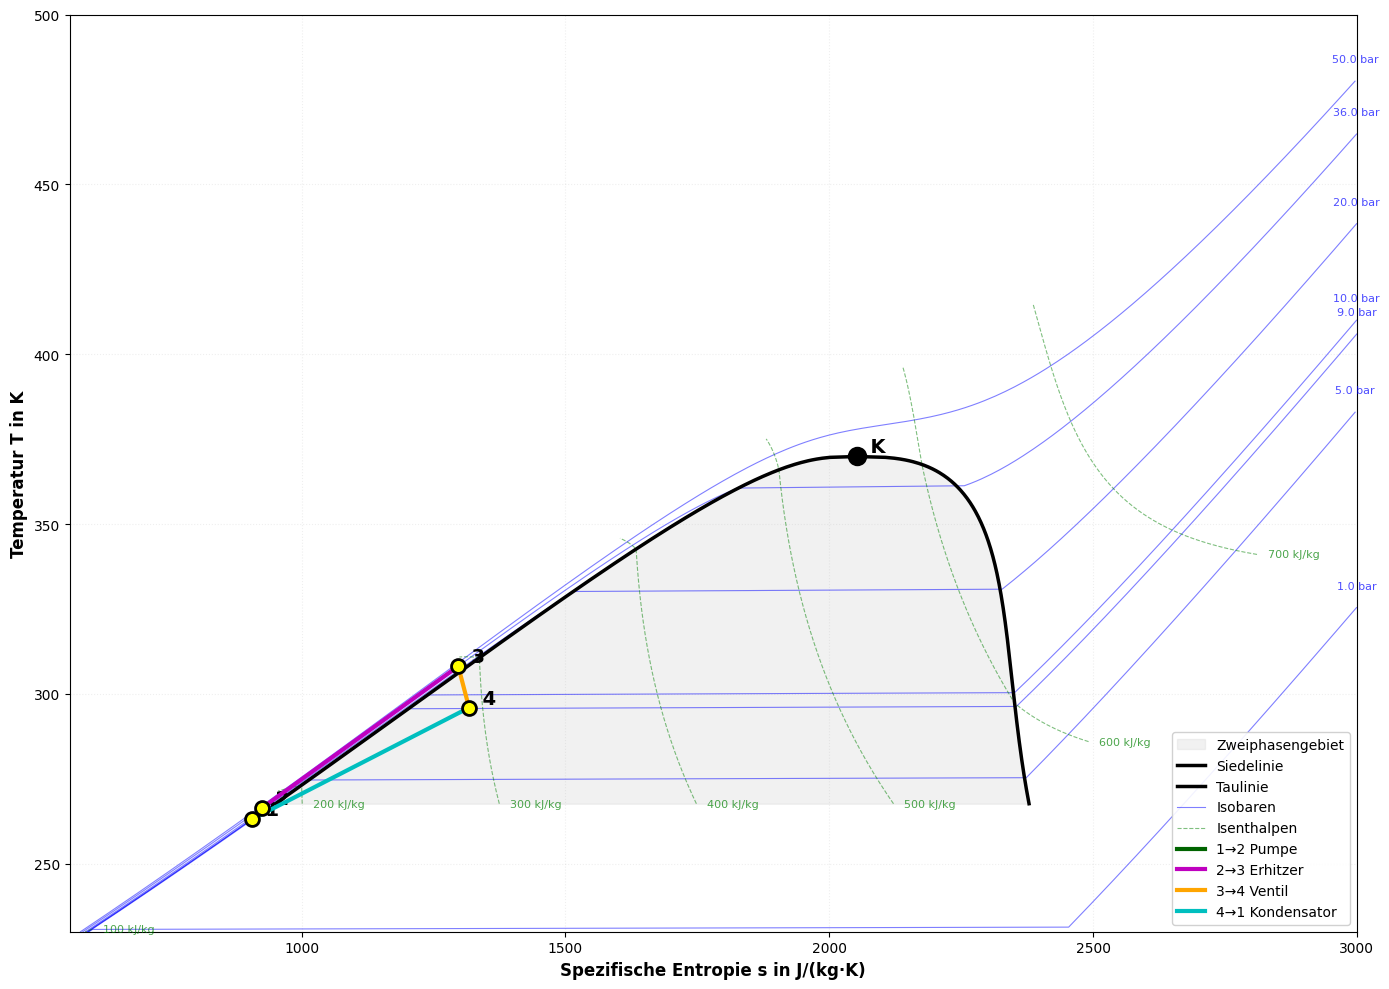

In [36]:
# ============================================================================
# T-s-DIAGRAMM (Temperatur-Entropie-Diagramm)
# ============================================================================

# Entropiebereich
s_min = 560    # J/(kg·K)
s_max = 3000   # J/(kg·K)

# Temperaturbereich
T_min = 230    # K
T_max = 500    # K

# Sättigungskurve (Siedelinie und Taulinie) für T-s-Diagramm
p_sat_Ts = np.linspace(p_min, p_crit, 200)
s_liquid = []  # Siedelinie
s_vapor = []   # Taulinie
T_sat = []     # Sättigungstemperatur

for p in p_sat_Ts:
    try:
        if p < p_crit:
            s_l = CP.PropsSI('S', 'P', p, 'Q', 0, fluid)  # Siedende Flüssigkeit
            s_v = CP.PropsSI('S', 'P', p, 'Q', 1, fluid)  # Gesättigter Dampf
            T_s = CP.PropsSI('T', 'P', p, 'Q', 0, fluid)  # Sättigungstemperatur
        else:
            s_l = CP.PropsSI('S', 'P', p_crit, 'T', T_crit, fluid)
            s_v = s_l
            T_s = T_crit
        s_liquid.append(s_l)
        s_vapor.append(s_v)
        T_sat.append(T_s)
    except:
        s_liquid.append(np.nan)
        s_vapor.append(np.nan)
        T_sat.append(np.nan)

# Isobaren (konstante Drucklinien) - BLAU
p_isobars_Ts = [0.1e6, p_1, 0.5e6, 1.0e6, 2.0e6, p_2, 5.0e6]
s_range = np.linspace(s_min, s_max, 500)

# Isenthalpen (konstante Enthalpielinien) - GRÜN
h_isenthalps = [100e3, 200e3, 300e3, 400e3, 500e3, 600e3, 700e3]  # J/kg

# Plot erstellen
fig, ax = plt.subplots(figsize=(14, 10))

# Zweiphasengebiet füllen
s_liquid_array = np.array(s_liquid)
s_vapor_array = np.array(s_vapor)
T_sat_array = np.array(T_sat)

# Entferne NaN-Werte
valid_idx_Ts = ~(np.isnan(s_liquid_array) | np.isnan(s_vapor_array) | np.isnan(T_sat_array))
s_liquid_valid = s_liquid_array[valid_idx_Ts]
s_vapor_valid = s_vapor_array[valid_idx_Ts]
T_sat_valid = T_sat_array[valid_idx_Ts]

# Zweiphasengebiet füllen
ax.fill_betweenx(T_sat_valid, s_liquid_valid, s_vapor_valid, 
                 color='lightgray', alpha=0.3, zorder=1, label='Zweiphasengebiet')

# Sättigungskurve zeichnen
ax.plot(s_liquid_array, T_sat_array, 'k-', linewidth=2.5, 
        label='Siedelinie', zorder=3)
ax.plot(s_vapor_array, T_sat_array, 'k-', linewidth=2.5, 
        label='Taulinie', zorder=3)

# Kritischen Punkt markieren
s_crit = CP.PropsSI('S', 'P', p_crit, 'T', T_crit, fluid)
ax.plot(s_crit, T_crit, 'ko', markersize=12, markerfacecolor='black', 
        markeredgewidth=2, zorder=7)
ax.text(s_crit, T_crit, '  K', fontsize=14, fontweight='bold', 
        ha='left', va='bottom', color='black')

# Flags für Legende
isobar_Ts_plotted = False
isenthalp_plotted = False

# Isobaren zeichnen (BLAU)
for p_iso in p_isobars_Ts:
    s_iso = []
    T_iso_list = []
    
    # Im flüssigen und überhitzten Bereich
    for T in np.linspace(T_min, T_max, 400):
        try:
            s_test = CP.PropsSI('S', 'T', T, 'P', p_iso, fluid)
            if s_min < s_test < s_max:
                s_iso.append(s_test)
                T_iso_list.append(T)
        except:
            pass
    
    if len(s_iso) > 1:
        if not isobar_Ts_plotted:
            ax.plot(s_iso, T_iso_list, color='blue', linewidth=0.8, alpha=0.5, 
                    linestyle='-', label='Isobaren')
            isobar_Ts_plotted = True
        else:
            ax.plot(s_iso, T_iso_list, color='blue', linewidth=0.8, alpha=0.5, 
                    linestyle='-')
        
        # Beschriftung am oberen Rand
        if len(s_iso) > 10:
            idx_top = np.argmax(T_iso_list)
            ax.text(s_iso[idx_top], T_iso_list[idx_top] + 5, 
                    f'{p_iso/1e5:.1f} bar', 
                    fontsize=8, ha='center', va='bottom', alpha=0.7, color='blue')

# Isenthalpen zeichnen (GRÜN)
for h_iso in h_isenthalps:
    s_iso = []
    T_iso_list = []
    
    # Über Druckbereich
    for p in np.linspace(p_min, p_max, 400):
        try:
            T_test = CP.PropsSI('T', 'H', h_iso, 'P', p, fluid)
            s_test = CP.PropsSI('S', 'H', h_iso, 'P', p, fluid)
            if T_min < T_test < T_max and s_min < s_test < s_max:
                s_iso.append(s_test)
                T_iso_list.append(T_test)
        except:
            pass
    
    if len(s_iso) > 1:
        if not isenthalp_plotted:
            ax.plot(s_iso, T_iso_list, color='green', linewidth=0.8, alpha=0.5, 
                    linestyle='--', label='Isenthalpen')
            isenthalp_plotted = True
        else:
            ax.plot(s_iso, T_iso_list, color='green', linewidth=0.8, alpha=0.5, 
                    linestyle='--')
        
        # Beschriftung am rechten Rand
        if len(s_iso) > 10:
            idx_right = np.argmax(s_iso)
            ax.text(s_iso[idx_right] + 20, T_iso_list[idx_right], 
                    f'{h_iso/1000:.0f} kJ/kg', 
                    fontsize=8, ha='left', va='center', alpha=0.7, color='green')

# Kreisprozess einzeichnen
# 1 → 2: Pumpe
s_12 = np.linspace(s_1, s_2, 50)
T_12 = np.linspace(T_1, T_2, 50)
ax.plot(s_12, T_12, color='darkgreen', linewidth=3, label='1→2 Pumpe', zorder=5)

# 2 → 3: Erhitzer (isobar)
s_23 = np.linspace(s_2, s_3, 50)
T_23 = np.linspace(T_2, T_3, 50)
ax.plot(s_23, T_23, 'm-', linewidth=3, label='2→3 Erhitzer', zorder=5)

# 3 → 4: Expansionsventil (isenthalp)
s_34 = np.linspace(s_3, s_4, 50)
T_34 = np.linspace(T_3, T_4, 50)
ax.plot(s_34, T_34, 'orange', linewidth=3, label='3→4 Ventil', zorder=5)

# 4 → 1: Kondensator (isobar)
s_41 = np.linspace(s_4, s_1, 50)
T_41 = np.linspace(T_4, T_1, 50)
ax.plot(s_41, T_41, 'c-', linewidth=3, label='4→1 Kondensator', zorder=5)

# Zustandspunkte markieren
states_Ts = [(s_1, T_1, '1'), (s_2, T_2, '2'), (s_3, T_3, '3'), (s_4, T_4, '4')]
for s, T, label in states_Ts:
    ax.plot(s, T, 'ko', markersize=10, markerfacecolor='yellow', 
            markeredgewidth=2, zorder=6)
    ax.text(s, T, f'  {label}', fontsize=14, fontweight='bold', 
            ha='left', va='bottom')

# Achsenbeschriftung und Layout
ax.set_xlabel('Spezifische Entropie s in J/(kg·K)', fontsize=12, fontweight='bold')
ax.set_ylabel('Temperatur T in K', fontsize=12, fontweight='bold')
ax.grid(True, which='both', linestyle=':', alpha=0.2)
ax.legend(loc='lower right', fontsize=10, framealpha=0.9)
ax.set_xlim([s_min, s_max])
ax.set_ylim([T_min, T_max])

plt.tight_layout()
plt.show()

## T-s-Diagramm

### T-s-Detailansicht

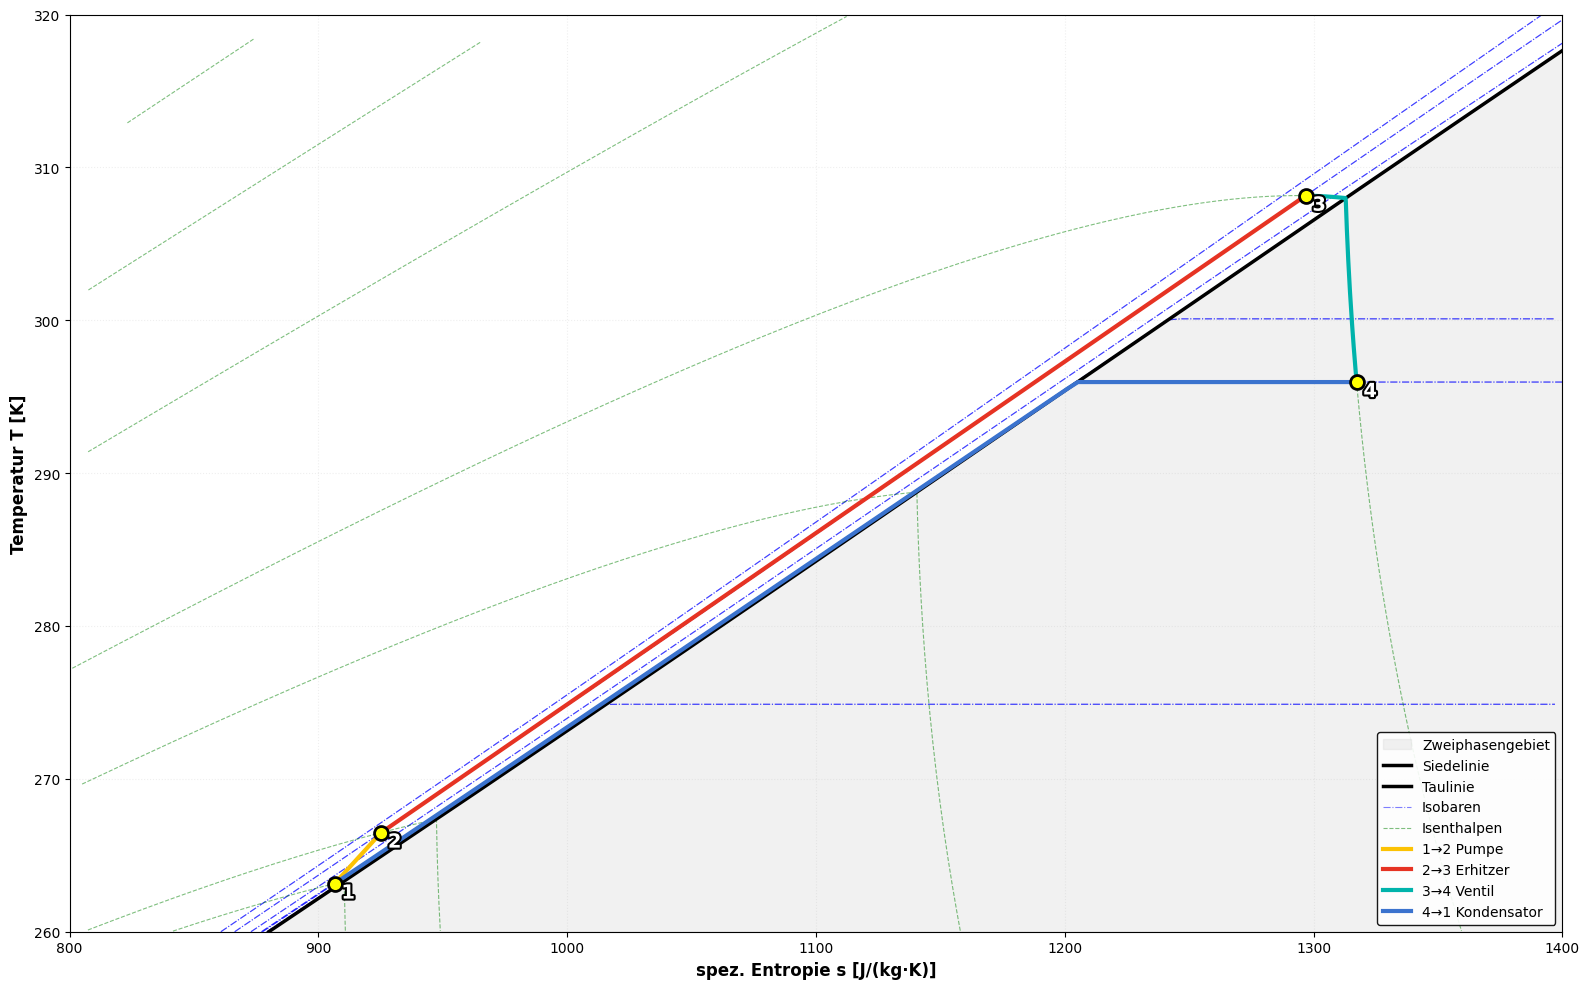

In [37]:
# ============================================================================
# T-s-DIAGRAMM-Detailansicht (Temperatur-Entropie-Diagramm)
# ============================================================================

# Entropiebereich
s_min = 800    # J/(kg·K)
s_max = 1400   # J/(kg·K)

# Temperaturbereich
T_min = 260    # K
T_max = 320    # K

# Sättigungskurve (Siedelinie und Taulinie) für T-s-Diagramm
p_sat_Ts = np.linspace(p_min, p_crit, 200)
s_liquid = []  # Siedelinie
s_vapor = []   # Taulinie
T_sat = []     # Sättigungstemperatur

for p in p_sat_Ts:
    try:
        if p < p_crit:
            s_l = CP.PropsSI('S', 'P', p, 'Q', 0, fluid)  # Siedende Flüssigkeit
            s_v = CP.PropsSI('S', 'P', p, 'Q', 1, fluid)  # Gesättigter Dampf
            T_s = CP.PropsSI('T', 'P', p, 'Q', 0, fluid)  # Sättigungstemperatur
        else:
            s_l = CP.PropsSI('S', 'P', p_crit, 'T', T_crit, fluid)
            s_v = s_l
            T_s = T_crit
        s_liquid.append(s_l)
        s_vapor.append(s_v)
        T_sat.append(T_s)
    except:
        s_liquid.append(np.nan)
        s_vapor.append(np.nan)
        T_sat.append(np.nan)

# Erweitere Sättigungslinien bis T_min
# Bestimme Entropie bei T_min für beide Linien
try:
    p_at_Tmin = CP.PropsSI('P', 'T', T_min, 'Q', 0, fluid)
    s_liquid_at_Tmin = CP.PropsSI('S', 'T', T_min, 'Q', 0, fluid)
    s_vapor_at_Tmin = CP.PropsSI('S', 'T', T_min, 'Q', 1, fluid)
    
    # Füge T_min Punkte am Anfang hinzu
    s_liquid = [s_liquid_at_Tmin] + s_liquid
    s_vapor = [s_vapor_at_Tmin] + s_vapor
    T_sat = [T_min] + T_sat
except:
    pass

# Isobaren (konstante Drucklinien) - BLAU
p_isobars_Ts = [0.1e6, p_1, 0.5e6, 1.0e6, p_2, 2.0e6, 5.0e6]

# Isenthalpen (konstante Enthalpielinien) - GRÜN
h_isenthalps = [h_1, h_2, 240e3, h_3, 400e3, 500e3, 600e3, 700e3]  # J/kg

# Plot erstellen
fig, ax = plt.subplots(figsize=(16, 10))

# Zweiphasengebiet füllen
s_liquid_array = np.array(s_liquid)
s_vapor_array = np.array(s_vapor)
T_sat_array = np.array(T_sat)

# Entferne NaN-Werte
valid_idx_Ts = ~(np.isnan(s_liquid_array) | np.isnan(s_vapor_array) | np.isnan(T_sat_array))
s_liquid_valid = s_liquid_array[valid_idx_Ts]
s_vapor_valid = s_vapor_array[valid_idx_Ts]
T_sat_valid = T_sat_array[valid_idx_Ts]

# Zweiphasengebiet bis zum unteren Rand füllen
ax.fill_betweenx(T_sat_valid, s_liquid_valid, s_vapor_valid, 
                 color='lightgray', alpha=0.3, zorder=1, label='Zweiphasengebiet')

# Sättigungskurve zeichnen
ax.plot(s_liquid_array, T_sat_array, 'k-', linewidth=2.5, 
        label='Siedelinie', zorder=3)
ax.plot(s_vapor_array, T_sat_array, 'k-', linewidth=2.5, 
        label='Taulinie', zorder=3)


# Flags für Legende
isobar_plotted = False
isenthalp_plotted = False

# Isobaren zeichnen (auch im Zweiphasengebiet)
for idx, p_iso in enumerate(p_isobars_Ts):
    s_iso = []
    T_iso_list = []
    
    # Methode 1: Iteration über Temperaturen (für normale Bereiche)
    T_range = np.linspace(T_min, T_max, 800)
    for T in T_range:
        try:
            s_test = CP.PropsSI('S', 'T', T, 'P', p_iso, fluid)
            if s_min <= s_test <= s_max:
                s_iso.append(s_test)
                T_iso_list.append(T)
        except:
            # Wenn das fehlschlägt, prüfe ob wir im Zweiphasengebiet sind
            try:
                T_sat_p = CP.PropsSI('T', 'P', p_iso, 'Q', 0, fluid)
                if abs(T - T_sat_p) < 0.5 and T_min < T_sat_p < T_max:
                    s_l = CP.PropsSI('S', 'P', p_iso, 'Q', 0, fluid)
                    s_v = CP.PropsSI('S', 'P', p_iso, 'Q', 1, fluid)
                    for s_val in np.linspace(s_l, s_v, 20):
                        if s_min <= s_val <= s_max:
                            s_iso.append(s_val)
                            T_iso_list.append(T_sat_p)
            except:
                pass
    
    # Methode 2: Iteration über Entropien (für vollständige Abdeckung)
    # Dies fängt Bereiche auf, die Methode 1 verpasst hat
    s_range = np.linspace(s_min, s_max, 600)
    for s_val in s_range:
        try:
            T_test = CP.PropsSI('T', 'S', s_val, 'P', p_iso, fluid)
            if T_min <= T_test <= T_max:
                # Prüfe ob dieser Punkt noch nicht sehr nah an existierenden Punkten ist
                is_new_point = True
                for existing_s in s_iso:
                    if abs(s_val - existing_s) < 5:  # 5 J/(kg·K) Toleranz
                        is_new_point = False
                        break
                if is_new_point:
                    s_iso.append(s_val)
                    T_iso_list.append(T_test)
        except:
            pass
    
    if len(s_iso) > 1:
        # Sortiere nach Entropie für saubere Linien
        sorted_indices = np.argsort(s_iso)
        s_iso_sorted = np.array(s_iso)[sorted_indices]
        T_iso_sorted = np.array(T_iso_list)[sorted_indices]
        
        if not isobar_plotted:
            ax.plot(s_iso_sorted, T_iso_sorted, color='blue', linewidth=0.8, alpha=0.5, 
                    linestyle='dashdot', label='Isobaren')
            isobar_plotted = True
        else:
            ax.plot(s_iso_sorted, T_iso_sorted, color='blue', linewidth=0.8, alpha=0.5, 
                    linestyle='dashdot')
        
        if not isobar_plotted:
            ax.plot(s_iso_sorted, T_iso_sorted, color='blue', linewidth=0.8, alpha=0.5, 
                    linestyle='dashdot', label='Isobaren')
            isobar_plotted = True
        else:
            ax.plot(s_iso_sorted, T_iso_sorted, color='blue', linewidth=0.8, alpha=0.5, 
                    linestyle='dashdot')
# Isenthalpen zeichnen
p_min_isenthalp = 0.0001e6
p_max_isenthalp = 720e6

for h_iso in h_isenthalps:
    s_iso = []
    T_iso_list = []
    
    p_range_log = np.logspace(np.log10(p_min_isenthalp), 
                               np.log10(p_max_isenthalp), 800)
    
    for p in p_range_log:
        try:
            T_test = CP.PropsSI('T', 'H', h_iso, 'P', p, fluid)
            s_test = CP.PropsSI('S', 'H', h_iso, 'P', p, fluid)
            if T_min < T_test < T_max and s_min < s_test < s_max:
                s_iso.append(s_test)
                T_iso_list.append(T_test)
        except:
            pass
    
    if len(s_iso) > 1:
        sorted_indices = np.argsort(s_iso)
        s_iso_sorted = np.array(s_iso)[sorted_indices]
        T_iso_sorted = np.array(T_iso_list)[sorted_indices]
        
        if not isenthalp_plotted:
            ax.plot(s_iso_sorted, T_iso_sorted, color='green', linewidth=0.8, 
                    alpha=0.5, linestyle='--', label='Isenthalpen')
            isenthalp_plotted = True
        else:
            ax.plot(s_iso_sorted, T_iso_sorted, color='green', linewidth=0.8, 
                    alpha=0.5, linestyle='--')

# Kreisprozess einzeichnen
# 1 → 2: Pumpe
s_12 = np.linspace(s_1, s_2, 50)
T_12 = np.linspace(T_1, T_2, 50)
ax.plot(s_12, T_12, color='#FCC204', linewidth=3, label='1→2 Pumpe', zorder=5)

# 2 → 3: Erhitzer (isobar)
s_23 = np.linspace(s_2, s_3, 50)
T_23 = np.linspace(T_2, T_3, 50)
ax.plot(s_23, T_23, '#E63323', linewidth=3, label='2→3 Erhitzer', zorder=5)

# 3 → 4: Expansionsventil (isenthalp)
s_34_actual = []
T_34_actual = []
for p_val in np.linspace(p_3, p_4, 150):
    try:
        T_test = CP.PropsSI('T', 'H', h_3, 'P', p_val, fluid)
        s_test = CP.PropsSI('S', 'H', h_3, 'P', p_val, fluid)
        if T_min < T_test < T_max and s_min < s_test < s_max:
            s_34_actual.append(s_test)
            T_34_actual.append(T_test)
    except:
        pass

if len(s_34_actual) > 1:
    ax.plot(s_34_actual, T_34_actual, '#00B3AB', linewidth=3, label='3→4 Ventil', zorder=5)
else:
    s_34 = np.linspace(s_3, s_4, 50)
    T_34 = np.linspace(T_3, T_4, 50)
    ax.plot(s_34, T_34, '#00B3AB', linewidth=3, label='3→4 Ventil', zorder=5)

# 4 → 1: Kondensator (isobar)
s_41_actual = []
T_41_actual = []
for s_val in np.linspace(s_4, s_1, 100):
    try:
        T_test = CP.PropsSI('T', 'S', s_val, 'P', p_1, fluid)
        if T_min < T_test < T_max:
            s_41_actual.append(s_val)
            T_41_actual.append(T_test)
    except:
        pass

if len(s_41_actual) > 1:
    ax.plot(s_41_actual, T_41_actual, '#3B73CE', linewidth=3, label='4→1 Kondensator', zorder=5)
else:
    s_41 = np.linspace(s_4, s_1, 50)
    T_41 = np.linspace(T_4, T_1, 50)
    ax.plot(s_41, T_41, '#3B73CE', linewidth=3, label='4→1 Kondensator', zorder=5)
# Zustandspunkte markieren
import matplotlib.patheffects as path_effects

states_Ts = [(s_1, T_1, '1'), (s_2, T_2, '2'), (s_3, T_3, '3'), (s_4, T_4, '4')]
for s, T, label in states_Ts:
    ax.plot(s, T, 'ko', markersize=10, markerfacecolor='yellow', 
            markeredgewidth=2, zorder=6)
    text = ax.text(s, T, f' {label}', fontsize=14, fontweight='bold', 
                   ha='left', va='top', color='white', zorder=7)
    text.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground='black'),
        path_effects.Normal()
    ])

# Achsenbeschriftung und Layout
ax.set_xlabel('spez. Entropie s [J/(kg·K)]', fontsize=12, fontweight='bold')
ax.set_ylabel('Temperatur T [K]', fontsize=12, fontweight='bold')
ax.grid(True, which='both', linestyle=':', alpha=0.2)
ax.legend(loc='lower right', fontsize=10, framealpha=0.9, edgecolor='black')
ax.set_xlim([s_min, s_max])
ax.set_ylim([T_min, T_max])

plt.tight_layout()
plt.show()

### Vollansicht

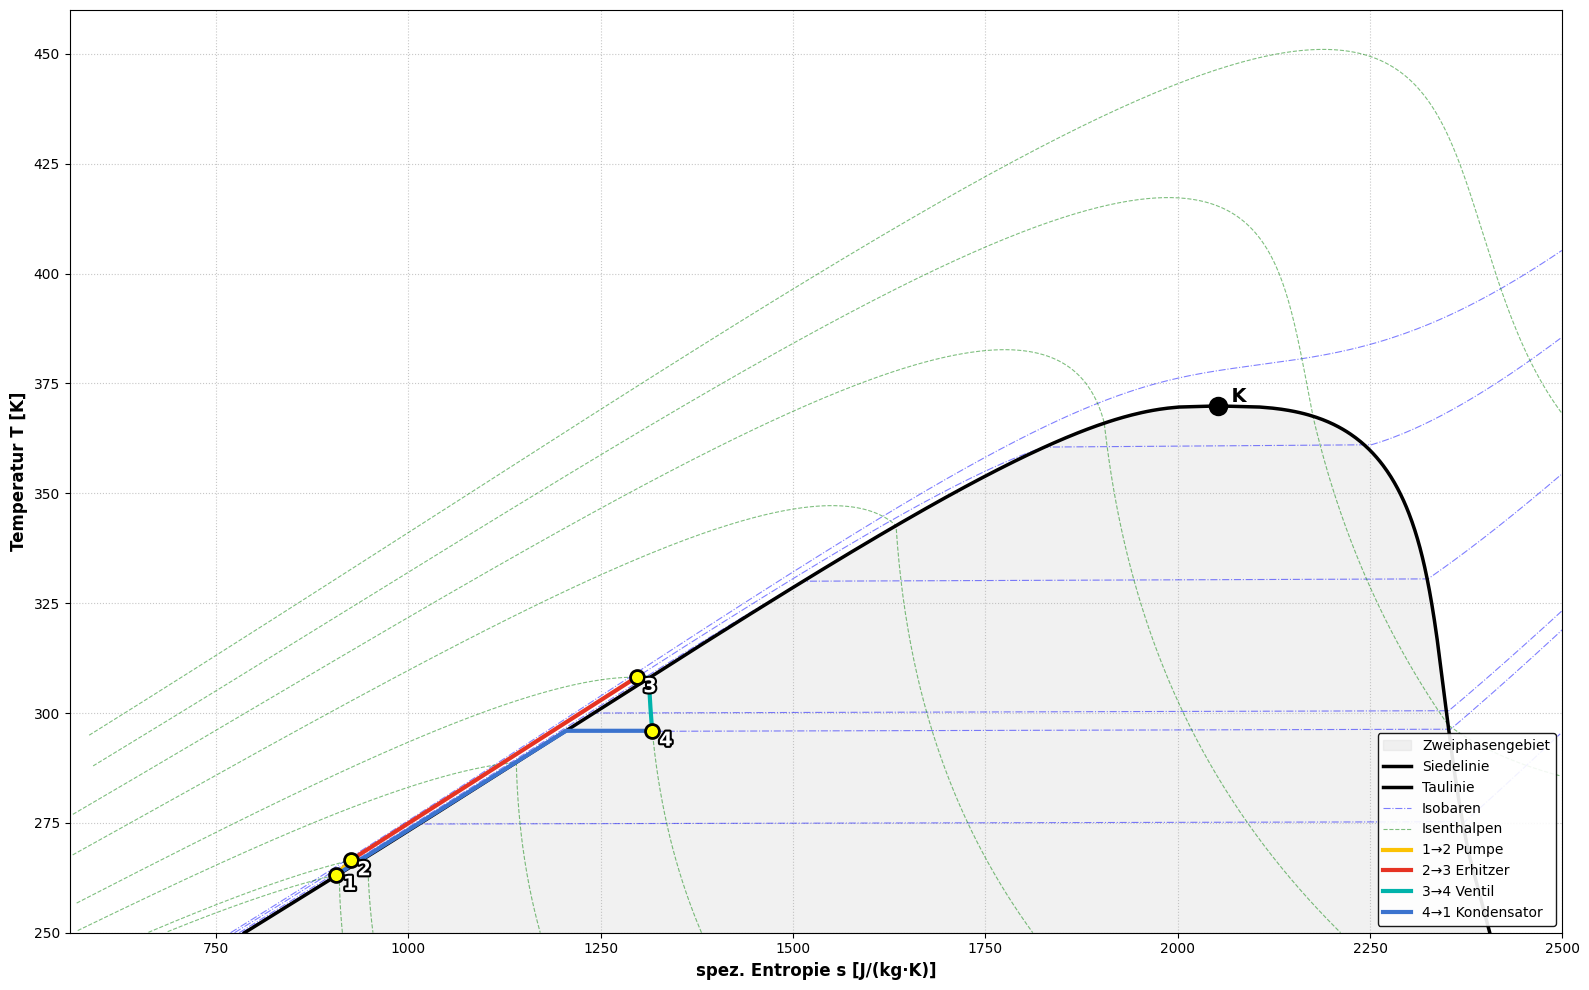

In [38]:
# ============================================================================
# T-s-DIAGRAMM (Temperatur-Entropie-Diagramm) - VOLLANSICHT
# ============================================================================

# Entropiebereich
s_min = 560    # J/(kg·K)
s_max = 2500   # J/(kg·K)

# Temperaturbereich
T_min = 250    # K
T_max = 460    # K

# Sättigungskurve (Siedelinie und Taulinie) für T-s-Diagramm
p_sat_Ts = np.linspace(p_min, p_crit, 200)
s_liquid = []  # Siedelinie
s_vapor = []   # Taulinie
T_sat = []     # Sättigungstemperatur

for p in p_sat_Ts:
    try:
        if p < p_crit:
            s_l = CP.PropsSI('S', 'P', p, 'Q', 0, fluid)  # Siedende Flüssigkeit
            s_v = CP.PropsSI('S', 'P', p, 'Q', 1, fluid)  # Gesättigter Dampf
            T_s = CP.PropsSI('T', 'P', p, 'Q', 0, fluid)  # Sättigungstemperatur
        else:
            s_l = CP.PropsSI('S', 'P', p_crit, 'T', T_crit, fluid)
            s_v = s_l
            T_s = T_crit
        s_liquid.append(s_l)
        s_vapor.append(s_v)
        T_sat.append(T_s)
    except:
        s_liquid.append(np.nan)
        s_vapor.append(np.nan)
        T_sat.append(np.nan)

# Erweitere Sättigungslinien bis T_min
# Bestimme Entropie bei T_min für beide Linien
try:
    p_at_Tmin = CP.PropsSI('P', 'T', T_min, 'Q', 0, fluid)
    s_liquid_at_Tmin = CP.PropsSI('S', 'T', T_min, 'Q', 0, fluid)
    s_vapor_at_Tmin = CP.PropsSI('S', 'T', T_min, 'Q', 1, fluid)
    
    # Füge T_min Punkte am Anfang hinzu
    s_liquid = [s_liquid_at_Tmin] + s_liquid
    s_vapor = [s_vapor_at_Tmin] + s_vapor
    T_sat = [T_min] + T_sat
except:
    pass

# Isobaren (konstante Drucklinien) - BLAU
p_isobars_Ts = [0.1e6, p_1, 0.5e6, 1.0e6, 2.0e6, p_2, 5.0e6]

# Isenthalpen (konstante Enthalpielinien) - GRÜN
h_isenthalps = [h_1, h_2, 240e3, h_3, 400e3, 500e3, 600e3, 700e3]  # J/kg

# Plot erstellen
fig, ax = plt.subplots(figsize=(16, 10))

# Zweiphasengebiet füllen
s_liquid_array = np.array(s_liquid)
s_vapor_array = np.array(s_vapor)
T_sat_array = np.array(T_sat)

# Entferne NaN-Werte
valid_idx_Ts = ~(np.isnan(s_liquid_array) | np.isnan(s_vapor_array) | np.isnan(T_sat_array))
s_liquid_valid = s_liquid_array[valid_idx_Ts]
s_vapor_valid = s_vapor_array[valid_idx_Ts]
T_sat_valid = T_sat_array[valid_idx_Ts]

# Zweiphasengebiet bis zum unteren Rand füllen
ax.fill_betweenx(T_sat_valid, s_liquid_valid, s_vapor_valid, 
                 color='lightgray', alpha=0.3, zorder=1, label='Zweiphasengebiet')

# Sättigungskurve zeichnen
ax.plot(s_liquid_array, T_sat_array, 'k-', linewidth=2.5, 
        label='Siedelinie', zorder=3)
ax.plot(s_vapor_array, T_sat_array, 'k-', linewidth=2.5, 
        label='Taulinie', zorder=3)

# Kritischen Punkt markieren
s_crit = CP.PropsSI('S', 'P', p_crit, 'T', T_crit, fluid)
ax.plot(s_crit, T_crit, 'ko', markersize=12, markerfacecolor='black', 
        markeredgewidth=2, zorder=7)
ax.text(s_crit, T_crit, '  K', fontsize=14, fontweight='bold', 
        ha='left', va='bottom', color='black')


# Flags für Legende
isobar_plotted = False
isenthalp_plotted = False

# Isobaren zeichnen
for idx, p_iso in enumerate(p_isobars_Ts):
    s_iso = []
    T_iso_list = []
    
    for T in np.linspace(T_min, T_max, 400):
        try:
            s_test = CP.PropsSI('S', 'T', T, 'P', p_iso, fluid)
            if s_min < s_test < s_max:
                s_iso.append(s_test)
                T_iso_list.append(T)
        except:
            pass
    
    if len(s_iso) > 1:
        if not isobar_plotted:
            ax.plot(s_iso, T_iso_list, color='blue', linewidth=0.8, alpha=0.5, 
                    linestyle='dashdot', label='Isobaren')
            isobar_plotted = True
        else:
            ax.plot(s_iso, T_iso_list, color='blue', linewidth=0.8, alpha=0.5, 
                    linestyle='dashdot')
# Isenthalpen zeichnen
p_min_isenthalp = 0.0001e6
p_max_isenthalp = 720e6

for h_iso in h_isenthalps:
    s_iso = []
    T_iso_list = []
    
    p_range_log = np.logspace(np.log10(p_min_isenthalp), 
                               np.log10(p_max_isenthalp), 800)
    
    for p in p_range_log:
        try:
            T_test = CP.PropsSI('T', 'H', h_iso, 'P', p, fluid)
            s_test = CP.PropsSI('S', 'H', h_iso, 'P', p, fluid)
            if T_min < T_test < T_max and s_min < s_test < s_max:
                s_iso.append(s_test)
                T_iso_list.append(T_test)
        except:
            pass
    
    if len(s_iso) > 1:
        sorted_indices = np.argsort(s_iso)
        s_iso_sorted = np.array(s_iso)[sorted_indices]
        T_iso_sorted = np.array(T_iso_list)[sorted_indices]
        
        if not isenthalp_plotted:
            ax.plot(s_iso_sorted, T_iso_sorted, color='green', linewidth=0.8, 
                    alpha=0.5, linestyle='--', label='Isenthalpen')
            isenthalp_plotted = True
        else:
            ax.plot(s_iso_sorted, T_iso_sorted, color='green', linewidth=0.8, 
                    alpha=0.5, linestyle='--')

# Kreisprozess einzeichnen
# 1 → 2: Pumpe
s_12 = np.linspace(s_1, s_2, 50)
T_12 = np.linspace(T_1, T_2, 50)
ax.plot(s_12, T_12, color='#FCC204', linewidth=3, label='1→2 Pumpe', zorder=5)

# 2 → 3: Erhitzer (isobar)
s_23 = np.linspace(s_2, s_3, 50)
T_23 = np.linspace(T_2, T_3, 50)
ax.plot(s_23, T_23, '#E63323', linewidth=3, label='2→3 Erhitzer', zorder=5)

# 3 → 4: Expansionsventil (isenthalp)
s_34_actual = []
T_34_actual = []
for p_val in np.linspace(p_3, p_4, 150):
    try:
        T_test = CP.PropsSI('T', 'H', h_3, 'P', p_val, fluid)
        s_test = CP.PropsSI('S', 'H', h_3, 'P', p_val, fluid)
        if T_min < T_test < T_max and s_min < s_test < s_max:
            s_34_actual.append(s_test)
            T_34_actual.append(T_test)
    except:
        pass

if len(s_34_actual) > 1:
    ax.plot(s_34_actual, T_34_actual, '#00B3AB', linewidth=3, label='3→4 Ventil', zorder=5)
else:
    s_34 = np.linspace(s_3, s_4, 50)
    T_34 = np.linspace(T_3, T_4, 50)
    ax.plot(s_34, T_34, '#00B3AB', linewidth=3, label='3→4 Ventil', zorder=5)

# 4 → 1: Kondensator (isobar)
s_41_actual = []
T_41_actual = []
for s_val in np.linspace(s_4, s_1, 100):
    try:
        T_test = CP.PropsSI('T', 'S', s_val, 'P', p_1, fluid)
        if T_min < T_test < T_max:
            s_41_actual.append(s_val)
            T_41_actual.append(T_test)
    except:
        pass

if len(s_41_actual) > 1:
    ax.plot(s_41_actual, T_41_actual, '#3B73CE', linewidth=3, label='4→1 Kondensator', zorder=5)
else:
    s_41 = np.linspace(s_4, s_1, 50)
    T_41 = np.linspace(T_4, T_1, 50)
    ax.plot(s_41, T_41, '#3B73CE', linewidth=3, label='4→1 Kondensator', zorder=5)

# Zustandspunkte markieren
import matplotlib.patheffects as path_effects

states_Ts = [(s_1, T_1, '1'), (s_2, T_2, '2'), (s_3, T_3, '3'), (s_4, T_4, '4')]
for s, T, label in states_Ts:
    ax.plot(s, T, 'ko', markersize=10, markerfacecolor='yellow', 
            markeredgewidth=2, zorder=6)
    text = ax.text(s, T, f' {label}', fontsize=14, fontweight='bold', 
                   ha='left', va='top', color='white', zorder=7)
    text.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground='black'),
        path_effects.Normal()
    ])

# Achsenbeschriftung und Layout
ax.set_xlabel('spez. Entropie s [J/(kg·K)]', fontsize=12, fontweight='bold')
ax.set_ylabel('Temperatur T [K]', fontsize=12, fontweight='bold')
ax.grid(True, which='both', linestyle=':', alpha=0.7)
ax.legend(loc='lower right', fontsize=10, 
          framealpha=0.9, edgecolor='black')
ax.set_xlim([s_min, s_max])
ax.set_ylim([T_min, T_max])

plt.tight_layout()
plt.show()

## Tabelle - Zustandsgrößen

In [39]:
T_i = [T_1, T_2, T_3, T_4]
vartheta_i = [T_i[i]-273.15 for i in range(4)]

for i, vartheta in enumerate(vartheta_i):
    print(f" vartheta_{i+1}: {vartheta:.2f} °C")

Z1 = [T_i[0], vartheta_i[0], p_1/1e6, h_1/1000, s_1, rho_1]
Z2 = [T_i[1], vartheta_i[1], p_2/1e6, h_2/1000, s_2, rho_2]
Z3 = [T_i[2], vartheta_i[2], p_3/1e6, h_3/1000, s_3, rho_3]
Z4 = [T_i[3], vartheta_i[3], p_4/1e6, h_4/1000, s_4, rho_4]

print("\nZustandsgrößen des Kreisprozesses:")
print(f"{'Zustand':>8} | {'T (K)':>8} | {'ϑ (°C)':>10} | {'p (MPa)':>10} | {'h (kJ/kg)':>12} | {'s (J/(kg·K))':>15} | {'ρ (kg/m³)':>12}")
print("-"*100)
print(f"{'1':>8} | {Z1[0]:>8.2f} | {Z1[1]:>10.2f} | {Z1[2]:>10.2f} | {Z1[3]:>12.2f} | {Z1[4]:>15.2f} | {Z1[5]:>12.2f}")
print(f"{'2':>8} | {Z2[0]:>8.2f} | {Z2[1]:>10.2f} | {Z2[2]:>10.2f} | {Z2[3]:>12.2f} | {Z2[4]:>15.2f} | {Z2[5]:>12.2f}")
print(f"{'3':>8} | {Z3[0]:>8.2f} | {Z3[1]:>10.2f} | {Z3[2]:>10.2f} | {Z3[3]:>12.2f} | {Z3[4]:>15.2f} | {Z3[5]:>12.2f}")
print(f"{'4':>8} | {Z4[0]:>8.2f} | {Z4[1]:>10.2f} | {Z4[2]:>10.2f} | {Z4[3]:>12.2f} | {Z4[4]:>15.2f} | {Z4[5]:>12.2f}")

 vartheta_1: -10.00 °C
 vartheta_2: -6.67 °C
 vartheta_3: 35.00 °C
 vartheta_4: 22.81 °C

Zustandsgrößen des Kreisprozesses:
 Zustand |    T (K) |     ϑ (°C) |    p (MPa) |    h (kJ/kg) |    s (J/(kg·K)) |    ρ (kg/m³)
----------------------------------------------------------------------------------------------------
       1 |   263.15 |     -10.00 |       0.90 |       175.72 |          906.51 |       542.76
       2 |   266.48 |      -6.67 |       3.60 |       185.65 |          925.20 |       543.05
       3 |   308.15 |      35.00 |       3.60 |       292.39 |         1296.77 |       484.60
       4 |   295.96 |      22.81 |       0.90 |       292.39 |         1317.27 |       146.10


In [40]:
import pandas as pd

# Temperaturen in °C
vartheta_1 = T_1 - 273.15
vartheta_2 = T_2 - 273.15
vartheta_3 = T_3 - 273.15
vartheta_4 = T_4 - 273.15

# Daten in Dictionary strukturieren
data = {
    'Zustand': ['1', '2', '3', '4'],
    'T (K)': [T_1, T_2, T_3, T_4],
    'ϑ (°C)': [vartheta_1, vartheta_2, vartheta_3, vartheta_4],
    'p (MPa)': [p_1/1e6, p_2/1e6, p_3/1e6, p_4/1e6],
    'h (kJ/kg)': [h_1/1000, h_2/1000, h_3/1000, h_4/1000],
    's (J/(kg·K))': [s_1, s_2, s_3, s_4],
    'ρ (kg/m³)': [rho_1, rho_2, rho_3, rho_4]
}

# DataFrame erstellen
df = pd.DataFrame(data)

# Anzeigen
print("\nZustandsgrößen des Kreisprozesses:")
print("="*100)
print(df.to_string(index=False))
print("="*100)

# Als CSV mit Semikolon als Trennzeichen speichern
csv_filename = r'zustandsgroessen_kreisprozess.csv'
df.to_csv(csv_filename, sep=';', index=False, decimal=',', encoding='utf-8', float_format='%.2f')

print(f"\n✓ Daten wurden gespeichert: {csv_filename}")


Zustandsgrößen des Kreisprozesses:
Zustand      T (K)     ϑ (°C)  p (MPa)  h (kJ/kg)  s (J/(kg·K))  ρ (kg/m³)
      1 263.150000 -10.000000      0.9 175.723936    906.505029 542.755919
      2 266.482939  -6.667061      3.6 185.646748    925.195562 543.047640
      3 308.150000  35.000000      3.6 292.387255   1296.772177 484.600342
      4 295.956457  22.806457      0.9 292.387255   1317.265895 146.099947

✓ Daten wurden gespeichert: zustandsgroessen_kreisprozess.csv


In [41]:
print("\n" + "="*85)
print("PROZESSPARAMETER".center(85))
print("="*85)
print(f"{'Parameter':<15} {'Wert':>12} {'Einheit':<10} {'Beschreibung':<45}")
print("-"*85)
print(f"{'η_sP':<15} {eta_sP:>12.2f} {'-':<10} {'isentroper Wirkungsgrad der Pumpe':<45}")
print(f"{'η_V':<15} {eta_V:>12.2f} {'-':<10} {'volumetrischer Wirkungsgrad der Pumpe':<45}")
print(f"{'ṁ':<15} {dot_m_ang:>12.4f} {'kg/s':<10} {'angenommener Massenstrom':<45}")
print(f"{'T_1':<15} {T_1-273.15:>12.2f} {'°C':<10} {'Temperatur am Einlass der Pumpe':<45}")
print(f"{'p_1':<15} {p_1/1e5:>12.2f} {'bar':<10} {'Druck am Einlass der Pumpe':<45}")
print(f"{'p_2':<15} {p_2/1e5:>12.2f} {'bar':<10} {'Druck am Ausgang der Pumpe':<45}")
print(f"{'T_3':<15} {T_3-273.15:>12.2f} {'°C':<10} {'max. Prozesstemperatur':<45}")
print(f"{'ψ_12':<15} {psi_12:>12.4f} {'-':<10} {'Druckverhältnis Pumpe':<45}")
print(f"{'Q̇_zu':<15} {dot_Q_23*1e-3:>12.2f} {'kW':<10} {'Wärmezufuhr im Erhitzer':<45}")
print(f"{'Q̇_ab':<15} {dot_Q_41*1e-3:>12.2f} {'kW':<10} {'Wärmeabfuhr im Kondensator':<45}")
print(f"{'P_t':<15} {P_t*1e-3:>12.4f} {'kW':<10} {'spezifische Pumpenleistung':<45}")
print(f"{'ε_WP':<15} {epsilon_WP:>12.2f} {'-':<10} {'Leistungszahl der Wärmepumpe':<45}")
print(f"{'V̇_th':<15} {dot_V_th*1e3:>12.4f} {'L/s':<10} {'theoretischer Volumenstrom':<45}")
print(f"{'V̇_real':<15} {dot_V_Real*1e3:>12.4f} {'L/s':<10} {'realer Volumenstrom':<45}")
print("="*85)


                                   PROZESSPARAMETER                                  
Parameter               Wert Einheit    Beschreibung                                 
-------------------------------------------------------------------------------------
η_sP                    0.50 -          isentroper Wirkungsgrad der Pumpe            
η_V                     0.90 -          volumetrischer Wirkungsgrad der Pumpe        
ṁ                     0.0400 kg/s       angenommener Massenstrom                     
T_1                   -10.00 °C         Temperatur am Einlass der Pumpe              
p_1                     9.00 bar        Druck am Einlass der Pumpe                   
p_2                    36.00 bar        Druck am Ausgang der Pumpe                   
T_3                    35.00 °C         max. Prozesstemperatur                       
ψ_12                  4.0000 -          Druckverhältnis Pumpe                        
Q̇_zu                   4.27 kW         Wärmezufuhr i